# Ejemplo del Fashion/MNIST


In [1]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from sklearn.metrics import classification_report


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()


In [8]:
print(x_train.shape)
print(x_test.shape)

np.amax(x_test)


(60000, 28, 28)
(10000, 28, 28)


255

In [15]:
ytrain = tf.keras.utils.to_categorical(y_train)
ytest = tf.keras.utils.to_categorical(y_test)

ytrain

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
x_train, x_test = x_train/255.0, x_test/255.0

In [6]:
model = tf.keras.models.Sequential([
   tf.keras.layers.Flatten(input_shape=(28,28)),
   tf.keras.layers.Dense(1024,activation=tf.nn.relu),
   tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [7]:
model.compile(optimizer='adam', 
   loss='categorical_crossentropy',
   metrics=['accuracy'])

In [29]:
n_epochs=10
n_batch=128

In [30]:
H = model.fit(x_train,ytrain, validation_data=(x_test,ytest),
              epochs=n_epochs, batch_size=n_batch)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1533 - accuracy: 0.9428 - val_loss: 0.4199 - val_accuracy: 0.8971
Epoch 2/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1305 - accuracy: 0.9514 - val_loss: 0.4279 - val_accuracy: 0.8967
Epoch 3/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1243 - accuracy: 0.9529 - val_loss: 0.4398 - val_accuracy: 0.8975
Epoch 4/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1207 - accuracy: 0.9542 - val_loss: 0.4387 - val_accuracy: 0.8988
Epoch 5/10
60000/60000 [==============================] - 42031s 701ms/sample - loss: 0.1180 - accuracy: 0.9552 - val_loss: 0.4389 - val_accuracy: 0.8976
Epoch 6/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1154 - accuracy: 0.9564 - val_loss: 0.4455 - val_accuracy: 0.8983
Epoch 7/10
60000/60000 [===========================

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [25]:
predictions = model.predict(x_test, batch_size=n_batch)

In [26]:
labels = ["T_shirt","Trouser","Pullover","Dress","Coat",
          "Sandal","Shirt","Sneaker","Bag","Ankle_boot"]

In [27]:
print(classification_report(ytest.argmax(axis=1), 
      predictions.argmax(axis=1),target_names=labels))

              precision    recall  f1-score   support

     T_shirt       0.84      0.82      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.75      0.83      0.79      1000
       Dress       0.92      0.82      0.87      1000
        Coat       0.77      0.76      0.76      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.66      0.69      0.68      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.98      0.96      0.97      1000
  Ankle_boot       0.97      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



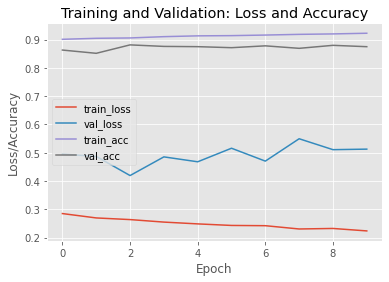

In [28]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss") 
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation: Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()
#plt.savefig("misFotos/tmp_mi_fashion_mnist.png")


In [0]:
#model.save("mis_pesos.hdf5")